In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
#Reading Data
elec_df=pd.read_csv('ratings_Electronics.csv')
elec_df.columns=(['userId','productId','ratings','timestramp'])
elec_df.head()

,userId,productId,ratings,timestramp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [36]:
elec_df.shape

(7824481, 4)

In [37]:
elec_df.describe()

,ratings,timestramp
count,7.824481e+06,7.824481e+06
mean,4.012337e+00,1.338178e+09
std,1.380910e+00,6.900426e+07
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.315354e+09
50%,5.000000e+00,1.361059e+09
75%,5.000000e+00,1.386115e+09
max,5.000000e+00,1.406074e+09


In [38]:
elec_df.isnull().any()

userId        False
productId     False
ratings       False
timestramp    False
dtype: bool

In [39]:
elec_df=elec_df.drop(['timestramp'],axis=1)

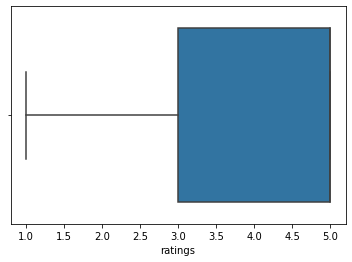

In [40]:
sns.boxplot(elec_df['ratings'])

Most of the ratings lie in the range of 3.0 to 5.0

In [41]:
#Using only 10% of the data due to memory issues in jupyter notebook
elec_df=elec_df[0:782442]

In [42]:
elec_df.dtypes

userId        object
productId     object
ratings      float64
dtype: object

In [43]:
df=elec_df.groupby(['userId']).count().reset_index()
df=df.drop(['productId'],axis=1)
from surprise import KNNWithMeans


In [44]:
elec_df=elec_df.merge(df,how='inner',on='userId')

In [45]:
elec_df

,userId,productId,ratings_x,ratings_y
0,A2CX7LUOHB2NDG,0321732944,5.0,1
1,A2NWSAGRHCP8N5,0439886341,1.0,1
2,A2WNBOD3WNDNKT,0439886341,3.0,1
3,A1GI0U4ZRJA8WN,0439886341,1.0,1
4,A1QGNMC6O1VW39,0511189877,5.0,1
...,...,...,...,...
782437,AXQMXVJ5MOBG9,B000BUEGWM,5.0,1
782438,AE5KDX52901Q8,B000BUEGWM,5.0,1
782439,A375ZM6YHBXEDI,B000BUEGX6,4.0,1
782440,A1GRDP9QW9GY1U,B000BUEGX6,5.0,1


In [46]:
elec_df=elec_df.loc[elec_df['ratings_y']>=50]

Data with the users who have given 50 or more ratings

In [47]:
#for item in df['ratings'].iteritems():
    #if item[1]<50:
        #elec_df.drop(elec_df[elec_df['userId']==item[0]].index,inplace=True)

In [48]:
elec_df=elec_df.drop(['ratings_y'],axis=1)

In [49]:
elec_df

,userId,productId,ratings_x
2860,A5JLAU2ARJ0BO,1400532655,1.0
2861,A5JLAU2ARJ0BO,B00003006R,5.0
2862,A5JLAU2ARJ0BO,B00003G1RG,3.0
2863,A5JLAU2ARJ0BO,B00004S9AK,5.0
2864,A5JLAU2ARJ0BO,B00004SB92,4.0
...,...,...,...
191529,ABH9D1TEOJ56E,B0000DB4D1,5.0
191530,ABH9D1TEOJ56E,B0000DBJJT,4.0
191531,ABH9D1TEOJ56E,B0000DJY9P,4.0
191532,ABH9D1TEOJ56E,B0000DJYEO,3.0


In [50]:
elec_df.groupby(['productId']).count().sort_values(ascending=False,by='ratings_x').reset_index().head()

,productId,userId,ratings_x
0,B00004SB92,6,6
1,B00008OE6I,5,5
2,B00008OE5G,4,4
3,B00005AW1H,4,4
4,B0009RKL5S,4,4


Top 5 ratings

Popularity matrix predicts that product - B00007E7JU is highly popular and is recommended more

Item based recommendation system

In [51]:
from surprise import Dataset,Reader
from surprise.model_selection import train_test_split
from surprise import KNNWithMeans
from surprise import accuracy
reader=Reader()
surp_df=Dataset.load_from_df(elec_df[['productId','userId','ratings_x']],reader)
train_df,test_df=train_test_split(surp_df,test_size=0.3,random_state=1)

In [52]:
algo_item=KNNWithMeans(k=50,sim_options={'name':'pearson_baseline','user_based':False})
algo_item.fit(train_df)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [53]:
test_pred=algo_item.test(test_df)

In [54]:
print(accuracy.rmse(test_pred))


RMSE: 1.1102
1.1102213454614904


User based recommendation system

In [55]:
algo_user=KNNWithMeans(k=100,sim_options={'name':'cosine','user_based':True})
mat=algo_user.fit(train_df)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [56]:
test_pred=algo_user.test(test_df)

In [57]:
print(accuracy.rmse(test_pred,verbose=True))

RMSE: 1.1385
1.1385298738933904
